# Coding Etiquette & Excel Reporting

## Table of Contents

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Address PII Data
#### 4. Regional Data
#### 5. Exclusion of Low-Activity Customers
#### 6. Customer Profiling (1)
##### By Age
##### By Income
##### By Dependents
###### Import and Merge Departments Dataframe
##### By Department and Age
##### By Department and Income
##### By Department and Dependents
#### 7. Aggregations for Customer Profile-Level Usage Frequency and Expenditure
#### 8. Customer Profiling (2)
##### By Region and Age
##### By Region and Income
##### By Region and Dependents

# 01. Importing libraries

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [8]:
# Create path

path = r'C:\Users\16307\Desktop\Tasks - DA Immersion\Instacart Basket Analysis'

In [9]:
# Import customers_ords_prods_merge.pkl

orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merge.pkl'))

In [10]:
# Take a random sample of the dataset

sample_df = orders_products_all.sample(n=100)

# 03. Address PII data

In [12]:
# Check head for PII data

sample_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income
24391708,3404610,154954,12,3,13,4.0,7179,4,0,both,...,Frequent customer,Eugene,Person,Male,Iowa,35,5/27/2017,3,married,32045
17898986,185326,113290,34,5,15,7.0,9000,10,0,both,...,Frequent customer,Phyllis,Walters,Female,Louisiana,78,1/28/2020,2,married,59870
2028781,890990,13037,12,3,18,10.0,389,3,1,both,...,Frequent customer,Lisa,Phelps,Female,Oregon,59,8/7/2019,0,single,66215
6133520,2759047,39074,1,3,18,NaN,21903,4,0,both,...,Frequent customer,Michelle,Palacios,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959
28749534,2075964,182803,16,5,10,7.0,27156,6,1,both,...,Frequent customer,Barbara,Ryan,Female,Louisiana,78,3/21/2019,2,married,158405


In [13]:
# Drop "first_name" and "last_name" columns

sample_df.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,num_of_dependents,fam_status,income
24391708,3404610,154954,12,3,13,4.0,7179,4,0,both,...,Low spender,8.0,Frequent customer,Male,Iowa,35,5/27/2017,3,married,32045
17898986,185326,113290,34,5,15,7.0,9000,10,0,both,...,Low spender,6.0,Frequent customer,Female,Louisiana,78,1/28/2020,2,married,59870
2028781,890990,13037,12,3,18,10.0,389,3,1,both,...,Low spender,7.0,Frequent customer,Female,Oregon,59,8/7/2019,0,single,66215
6133520,2759047,39074,1,3,18,NaN,21903,4,0,both,...,Low spender,5.0,Frequent customer,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959
28749534,2075964,182803,16,5,10,7.0,27156,6,1,both,...,Low spender,7.0,Frequent customer,Female,Louisiana,78,3/21/2019,2,married,158405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13373145,2394147,84679,20,0,10,21.0,11123,5,1,both,...,Low spender,10.0,Frequent customer,Male,Louisiana,53,10/29/2018,0,single,152429
16644784,1282696,105383,4,1,7,8.0,20738,8,1,both,...,Low spender,7.0,Frequent customer,Male,Kansas,23,5/28/2017,1,married,101224
5766404,1219294,36721,23,2,17,16.0,21903,3,1,both,...,Low spender,10.0,Frequent customer,Female,Alabama,21,5/7/2017,0,single,88274
11875745,122612,75275,15,0,11,8.0,2121,11,0,both,...,Low spender,6.0,Frequent customer,Male,Wisconsin,54,2/17/2018,3,married,99023


# 04. Regional data

In [15]:
# Define a function to return region based on state

def get_region(state):
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        return 'South'
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'

In [16]:
# Create 'region' column

sample_df['region'] = sample_df['state'].apply(get_region)

In [17]:
# Check to see updated dataframe with 'region' column

sample_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,region
24391708,3404610,154954,12,3,13,4.0,7179,4,0,both,...,Eugene,Person,Male,Iowa,35,5/27/2017,3,married,32045,Midwest
17898986,185326,113290,34,5,15,7.0,9000,10,0,both,...,Phyllis,Walters,Female,Louisiana,78,1/28/2020,2,married,59870,South
2028781,890990,13037,12,3,18,10.0,389,3,1,both,...,Lisa,Phelps,Female,Oregon,59,8/7/2019,0,single,66215,West
6133520,2759047,39074,1,3,18,NaN,21903,4,0,both,...,Michelle,Palacios,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959,South
28749534,2075964,182803,16,5,10,7.0,27156,6,1,both,...,Barbara,Ryan,Female,Louisiana,78,3/21/2019,2,married,158405,South


In [18]:
# Create crosstab of spending_flag by region

crosstab = pd.crosstab(sample_df['region'], sample_df['spending_flag'], rownames=['Region'], colnames=['Spending Flag'])

In [19]:
# Show distribution of spending habits by region

print(crosstab)

Spending Flag  High spender  Low spender
Region                                  
Midwest                   0           19
Northeast                 0           13
South                     1           37
Unknown                   0            1
West                      0           29


# 05. Exclusion of Low-Activity Customers

In [21]:
# Count the number of orders per user

order_counts = sample_df['user_id'].value_counts()

In [22]:
# Find user_ids with 5 or more orders

users_with_sufficient_orders = order_counts[order_counts >= 5].index

In [23]:
# Filter the DataFrame to include only those users

filtered_df = sample_df[sample_df['user_id'].isin(users_with_sufficient_orders)]

In [24]:
# Check to see updated dataframe

filtered_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,region


The previous line of code gets rid of all data in the dataframe because the sample of 100 was so small. This was only for demonstration purposes proving that I understood the task. Moving forward I will not be using the filtered data, but instead go back to using the sample data due to memory restaints with my computer. 

In [26]:
# Check output

sample_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,region
24391708,3404610,154954,12,3,13,4.0,7179,4,0,both,...,Eugene,Person,Male,Iowa,35,5/27/2017,3,married,32045,Midwest
17898986,185326,113290,34,5,15,7.0,9000,10,0,both,...,Phyllis,Walters,Female,Louisiana,78,1/28/2020,2,married,59870,South
2028781,890990,13037,12,3,18,10.0,389,3,1,both,...,Lisa,Phelps,Female,Oregon,59,8/7/2019,0,single,66215,West
6133520,2759047,39074,1,3,18,NaN,21903,4,0,both,...,Michelle,Palacios,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959,South
28749534,2075964,182803,16,5,10,7.0,27156,6,1,both,...,Barbara,Ryan,Female,Louisiana,78,3/21/2019,2,married,158405,South


# 06. Customer Profiling

### Customer Profiling: Age

In [29]:
# Check descriptive statistics

sample_df['age'].describe()

count    100.000000
mean      49.850000
std       19.077394
min       18.000000
25%       33.000000
50%       51.500000
75%       66.000000
max       81.000000
Name: age, dtype: float64

In [30]:
# Create age group column

# Create Young Adult group
sample_df.loc[sample_df['age']<=34, 'age_group']= 'Young Adult'

# Create Middle Age group
sample_df.loc[(sample_df['age']>34)&(sample_df['age']<=54),'age_group']='Middle Age'

# Create Older Adult group
sample_df.loc[sample_df['age']>55, 'age_group']= 'Older Adult'

In [31]:
# Count the number of occurrences in each age group

age_group_counts = sample_df['age_group'].value_counts()

# Drop rows where 'age_group' is NaN
sample_df.dropna(subset=['age_group'], inplace=True)

age_group_counts

age_group
Older Adult    41
Middle Age     30
Young Adult    27
Name: count, dtype: int64

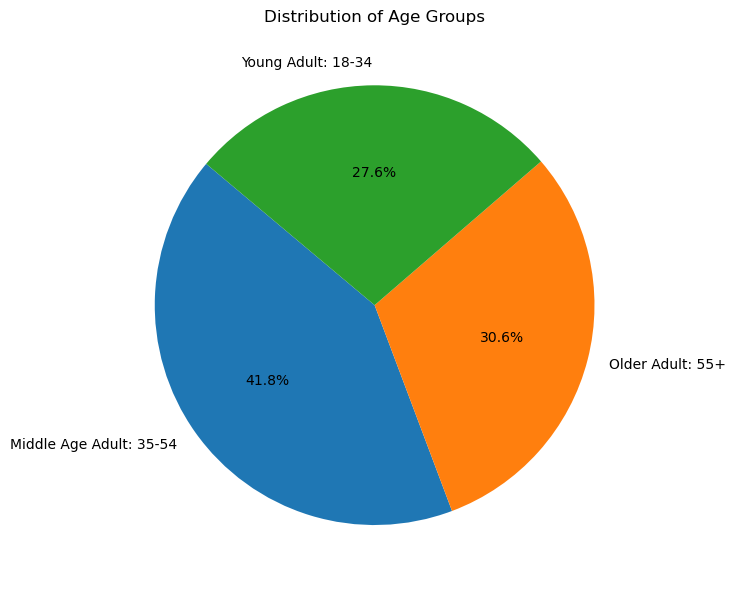

In [32]:
# Create pie chart for age groups

plt.figure(figsize=(8,6))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle Age Adult: 35-54','Older Adult: 55+','Young Adult: 18-34'), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [33]:
# Export pie chart

age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_pie_chart.png'))

### Customer Profiling: Income

In [35]:
# Check descriptive statistics

sample_df['income'].describe()

count        98.000000
mean      93065.081633
std       37143.071794
min       27423.000000
25%       61956.500000
50%       93144.000000
75%      116749.250000
max      164959.000000
Name: income, dtype: float64

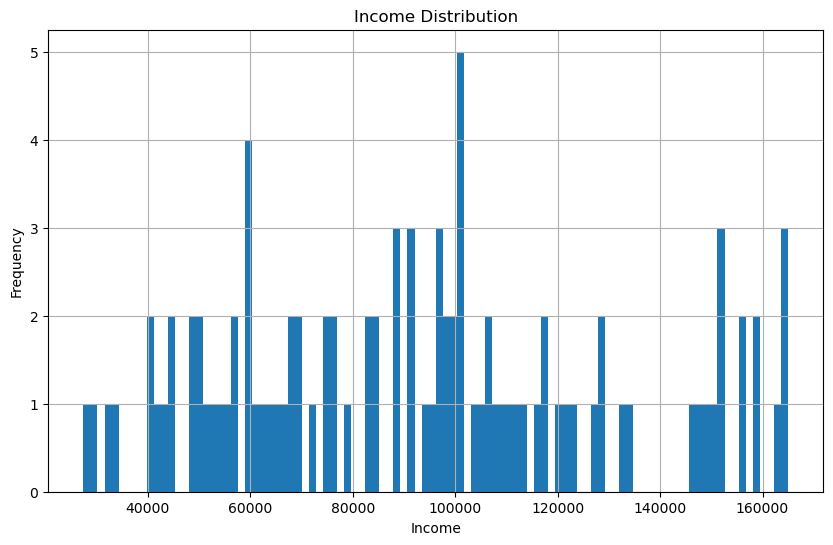

In [36]:
# Plot histogram

plt.figure(figsize=(10, 6))
income_distribution_histogram = sample_df['income'].plot.hist(bins = 100)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
# Export histogram

income_distribution_histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_histogram.png'))

In [38]:
# Create income level groups

# Create low income group
sample_df.loc[sample_df['income'] <= 30000, 'income_level'] = 'Low Income'

# Create middle income group
sample_df.loc[(sample_df['income'] > 30000) & (sample_df['income'] <= 100000), 'income_level'] = 'Middle Income'

# Create high income group
sample_df.loc[sample_df['income'] > 100000, 'income_level'] = 'High Income'

In [39]:
# Count the number of occurrences in each income level

income_counts = sample_df['income_level'].value_counts()
income_counts

income_level
Middle Income    56
High Income      40
Low Income        2
Name: count, dtype: int64

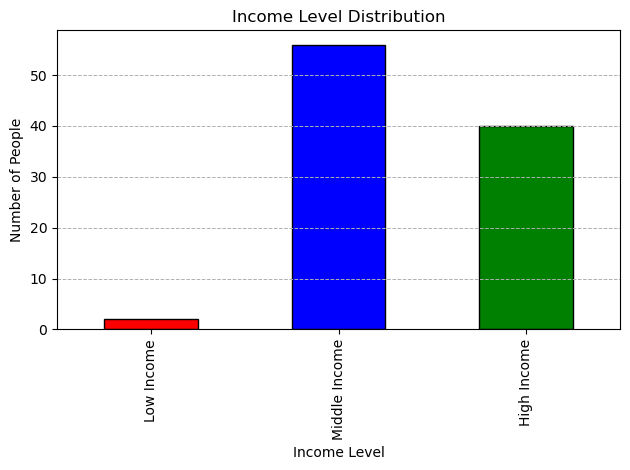

In [141]:
# Create bar chart for income level

# Define all possible categories
all_categories = ['Low Income', 'Middle Income', 'High Income']

# Get counts for each category and ensure missing categories are filled with 0
counts = sample_df['income_level'].value_counts().reindex(all_categories, fill_value=0)

# Define a color palette for each category
colors = ['red', 'blue', 'green']

# Plot the bar chart
counts.plot(kind='bar', color=colors, edgecolor='black')

# Add titles and labels
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Number of People')
plt.tight_layout()

# Add gridlines
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_level_bar_chart.png'))

# Display the chart
plt.show()

### Customer Profiling: Dependents

In [42]:
# Check descriptive statistics

sample_df['num_of_dependents'].describe()

count    98.000000
mean      1.561224
std       1.084724
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: num_of_dependents, dtype: float64

In [43]:
# Get the count of each unique value in the 'num_of_dependents' column

dependents_counts = sample_df['num_of_dependents'].value_counts().sort_index()
dependents_counts

num_of_dependents
0    21
1    25
2    28
3    24
Name: count, dtype: int64

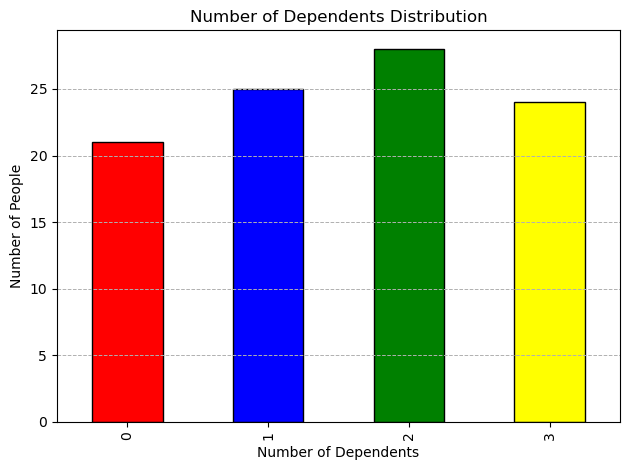

In [44]:
# Create bar chart for number of dependents

# Define a color palette for each category
colors = ['red', 'blue', 'green', 'yellow']

# Plot bar chart
dependents_counts.plot(kind='bar', color=colors, edgecolor='black')

# Add titles and labels
plt.title('Number of Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of People')

# Add gridlines
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_distribution_bar_chart.png'))

# Display the chart
plt.show()

In [45]:
# Create groups based on number of dependents

# Create yes group
sample_df.loc[sample_df['num_of_dependents'] > 0, 'dependents_flag'] = 'has dependents'

# Create no group
sample_df.loc[sample_df['num_of_dependents'] <= 0, 'dependents_flag'] = 'no dependents'

In [46]:
# Count the number of occurrences for both groups

dependents_flag_counts = sample_df['dependents_flag'].value_counts(dropna=False)
dependents_flag_counts

dependents_flag
has dependents    77
no dependents     21
Name: count, dtype: int64

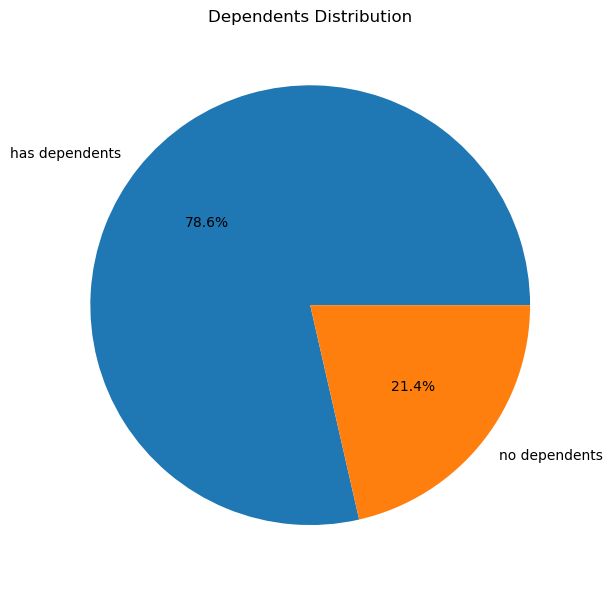

In [47]:
# Create pie chart for number of dependents

plt.figure(figsize=(8,6))
dependents_pie_chart=dependents_flag_counts.plot.pie(labels=('has dependents','no dependents'), autopct='%1.1f%%')
plt.title('Dependents Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [48]:
# Export pie chart

dependents_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependents_pie_chart.png'))

### Import and Merge Departments Dataframe

In [50]:
# Import departments csv

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [51]:
# Check output

df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [52]:
# Rename column

df_dept = df_dept.rename(columns={'Unnamed: 0': 'department_id'})

In [53]:
# Check output

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
pd.set_option('display.max_columns', None)

In [55]:
sample_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,region,age_group,income_level,dependents_flag
24391708,3404610,154954,12,3,13,4.0,7179,4,0,both,Chopped Pecans,117,19,4.7,Low-range product,Regularly busy,Regularly busy,Slowest days,Average orders,24,Regular customer,6.909945,Low spender,8.0,Frequent customer,Eugene,Person,Male,Iowa,35,5/27/2017,3,married,32045,Midwest,Middle Age,Middle Income,has dependents
17898986,185326,113290,34,5,15,7.0,9000,10,0,both,Organic Yellow Zucchini,83,4,6.2,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Average orders,59,Loyal customer,6.847025,Low spender,6.0,Frequent customer,Phyllis,Walters,Female,Louisiana,78,1/28/2020,2,married,59870,South,Older Adult,Middle Income,has dependents
2028781,890990,13037,12,3,18,10.0,389,3,1,both,Mache Blend,123,4,8.0,Mid-range product,Regularly busy,Regularly busy,Slowest days,Average orders,40,Regular customer,7.720308,Low spender,7.0,Frequent customer,Lisa,Phelps,Female,Oregon,59,8/7/2019,0,single,66215,West,Older Adult,Middle Income,no dependents
6133520,2759047,39074,1,3,18,NaN,21903,4,0,both,Organic Baby Spinach,123,4,8.2,Mid-range product,Regularly busy,Regularly busy,Slowest days,Average orders,13,Regular customer,9.103175,Low spender,5.0,Frequent customer,Michelle,Palacios,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959,South,Older Adult,High Income,no dependents
28749534,2075964,182803,16,5,10,7.0,27156,6,1,both,Organic Black Beans,59,15,6.1,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Most orders,36,Regular customer,8.098638,Low spender,7.0,Frequent customer,Barbara,Ryan,Female,Louisiana,78,3/21/2019,2,married,158405,South,Older Adult,High Income,has dependents


In [56]:
# Merge sample_df with df_dept on department_id
sample_df = sample_df.merge(df_dept[['department_id', 'department']], on='department_id', how='left')

In [57]:
sample_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,region,age_group,income_level,dependents_flag,department
0,3404610,154954,12,3,13,4.0,7179,4,0,both,Chopped Pecans,117,19,4.7,Low-range product,Regularly busy,Regularly busy,Slowest days,Average orders,24,Regular customer,6.909945,Low spender,8.0,Frequent customer,Eugene,Person,Male,Iowa,35,5/27/2017,3,married,32045,Midwest,Middle Age,Middle Income,has dependents,snacks
1,185326,113290,34,5,15,7.0,9000,10,0,both,Organic Yellow Zucchini,83,4,6.2,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Average orders,59,Loyal customer,6.847025,Low spender,6.0,Frequent customer,Phyllis,Walters,Female,Louisiana,78,1/28/2020,2,married,59870,South,Older Adult,Middle Income,has dependents,produce
2,890990,13037,12,3,18,10.0,389,3,1,both,Mache Blend,123,4,8.0,Mid-range product,Regularly busy,Regularly busy,Slowest days,Average orders,40,Regular customer,7.720308,Low spender,7.0,Frequent customer,Lisa,Phelps,Female,Oregon,59,8/7/2019,0,single,66215,West,Older Adult,Middle Income,no dependents,produce
3,2759047,39074,1,3,18,NaN,21903,4,0,both,Organic Baby Spinach,123,4,8.2,Mid-range product,Regularly busy,Regularly busy,Slowest days,Average orders,13,Regular customer,9.103175,Low spender,5.0,Frequent customer,Michelle,Palacios,Female,Delaware,74,3/5/2017,0,divorced/widowed,164959,South,Older Adult,High Income,no dependents,produce
4,2075964,182803,16,5,10,7.0,27156,6,1,both,Organic Black Beans,59,15,6.1,Mid-range product,Regularly busy,Regularly busy,Regularly busy,Most orders,36,Regular customer,8.098638,Low spender,7.0,Frequent customer,Barbara,Ryan,Female,Louisiana,78,3/21/2019,2,married,158405,South,Older Adult,High Income,has dependents,canned goods


In [58]:
# Count the number of occurrences in each department

sample_df['department'].value_counts()

department
produce            30
snacks             17
dairy eggs         14
beverages           8
deli                5
canned goods        4
frozen              4
bakery              4
pantry              3
meat seafood        2
dry goods pasta     2
breakfast           2
household           1
alcohol             1
babies              1
Name: count, dtype: int64

### Customer Profiling: Departments and Age

In [60]:
# Create department and age_group crosstab and display output

department_age=pd.crosstab(sample_df['department'], sample_df['age_group'], dropna=False)
department_age

age_group,Middle Age,Older Adult,Young Adult
department,,,
alcohol,0,1,0
babies,0,0,1
bakery,0,3,1
beverages,2,4,2
breakfast,1,0,1
canned goods,1,2,1
dairy eggs,6,6,2
deli,1,3,1
dry goods pasta,0,0,2


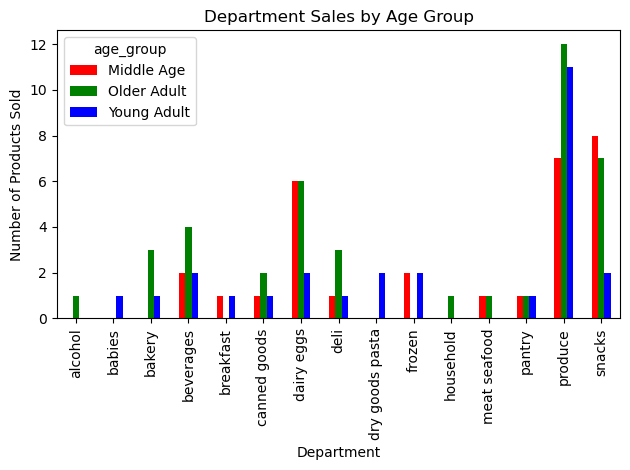

In [61]:
# Create bar chart
departments_age_bar=department_age.plot.bar(color=['red', 'green', 'blue'])

# Add labels
plt.title('Department Sales by Age Group')
plt.xlabel("Department")
plt.ylabel("Number of Products Sold")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_age_bar_chart.png'))

### Customer Profiling: Departments and Income

In [63]:
# Create department and income level crosstab and display output

department_income=pd.crosstab(sample_df['department'], sample_df['income_level'], dropna=False)
department_income

income_level,High Income,Low Income,Middle Income
department,,,
alcohol,1,0,0
babies,0,0,1
bakery,3,0,1
beverages,6,0,2
breakfast,0,0,2
canned goods,2,0,2
dairy eggs,4,0,10
deli,3,0,2
dry goods pasta,0,1,1


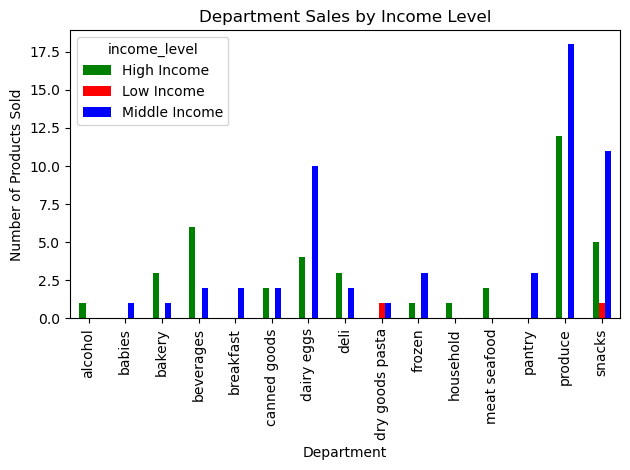

In [64]:
# Create bar chart
departments_income_bar=department_income.plot.bar(color=['green', 'red', 'blue'])

# Add labels
plt.title('Department Sales by Income Level')
plt.xlabel("Department")
plt.ylabel("Number of Products Sold")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_income_bar_chart.png'))

### Customer Profiling: Departments and Dependents

In [66]:
# Create department and dependents flag crosstab and display output

departments_dependents_flag=pd.crosstab(sample_df['department'], sample_df['dependents_flag'], dropna=False)
departments_dependents_flag

dependents_flag,has dependents,no dependents
department,,
alcohol,1,0
babies,0,1
bakery,4,0
beverages,7,1
breakfast,2,0
canned goods,4,0
dairy eggs,11,3
deli,4,1
dry goods pasta,2,0


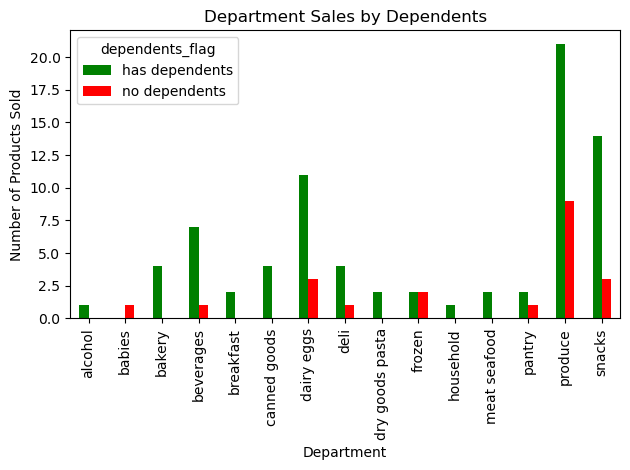

In [67]:
# Create bar chart
departments_dependents_bar=departments_dependents_flag.plot.bar(color=['green', 'red'])

# Add labels
plt.title('Department Sales by Dependents')
plt.xlabel("Department")
plt.ylabel("Number of Products Sold")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_dependents_bar_chart.png'))

## 07. Aggregations for Customer Profile-Level Usage Frequency and Expenditure

In [69]:
# Group by 'user_id' and calculate max, mean, and min
aggregated = sample_df.groupby('user_id').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],
    'orders_day_of_week': ['max', 'mean', 'min'],
    'order_hour_of_day': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min'],
})

# display output
aggregated

days_since_prior_order             orders_day_of_week           \
                           max  mean   min                max mean min   
user_id                                                                  
2437                       7.0   7.0   7.0                  6  6.0   6   
7279                       3.0   3.0   3.0                  1  1.0   1   
11665                     24.0  24.0  24.0                  0  0.0   0   
12284                      2.0   2.0   2.0                  0  0.0   0   
13037                     10.0  10.0  10.0                  3  3.0   3   
...                        ...   ...   ...                ...  ...  ..   
189774                    30.0  30.0  30.0                  0  0.0   0   
194466                     5.0   5.0   5.0                  1  1.0   1   
203785                    30.0  30.0  30.0                  5  5.0   5   
204808                     7.0   7.0   7.0                  1  1.0   1   
205163                     9.0   9.0   9.0                  4  4.0   4   

        order_hour_of_day           prices              
                      max  mean min    max  mean   min  
user_id                                                 
2437                   18  18.0  18    3.8   3.8   3.8  
7279                   14  14.0  14    5.7   5.7   5.7  
11665                  21  21.0  21    6.4   6.4   6.4  
12284                  10  10.0  10    3.6   3.6   3.6  
13037                  18  18.0  18    8.0   8.0   8.0  
...                   ...   ...  ..    ...   ...   ...  
189774                 11  11.0  11    5.5   5.5   5.5  
194466                 11  11.0  11    5.5   5.5   5.5  
203785                 11  11.0  11   12.6  12.6  12.6  
204808                 13  13.0  13    6.6   6.6   6.6  
205163                 10  10.0  10    2.4   2.4   2.4  

[97 rows x 12 columns]

### Customer Profiling: Region and Age

In [71]:
# Create region and age_group crosstab
region_age=pd.crosstab(sample_df['region'], sample_df['age_group'], dropna=False)

# Display output
region_age

age_group,Middle Age,Older Adult,Young Adult
region,,,
Midwest,6,8,5
Northeast,2,7,4
South,10,15,12
Unknown,0,1,0
West,12,10,6


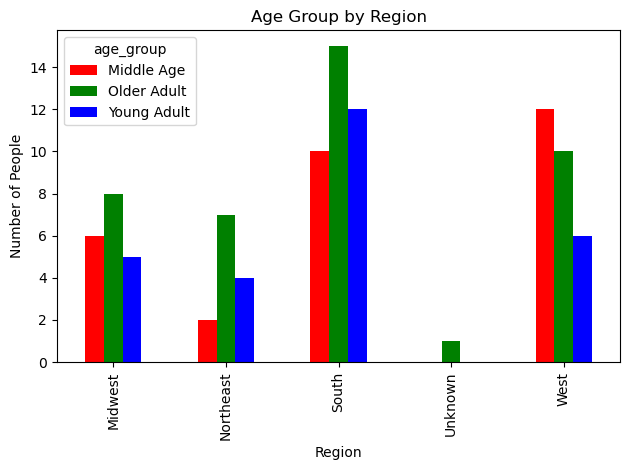

In [72]:
# Create bar chart
region_age_bar=region_age.plot.bar(color=['red', 'green', 'blue'])

# Add labels
plt.title('Age Group by Region')
plt.xlabel("Region")
plt.ylabel("Number of People")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age_bar_chart.png'))

### Customer Profiling: Region and Income

In [74]:
# Create region and income level crosstab

region_income=pd.crosstab(sample_df['region'], sample_df['income_level'], dropna=False)

# Display output
region_income

income_level,High Income,Low Income,Middle Income
region,,,
Midwest,10,0,9
Northeast,5,0,8
South,12,1,24
Unknown,1,0,0
West,12,1,15


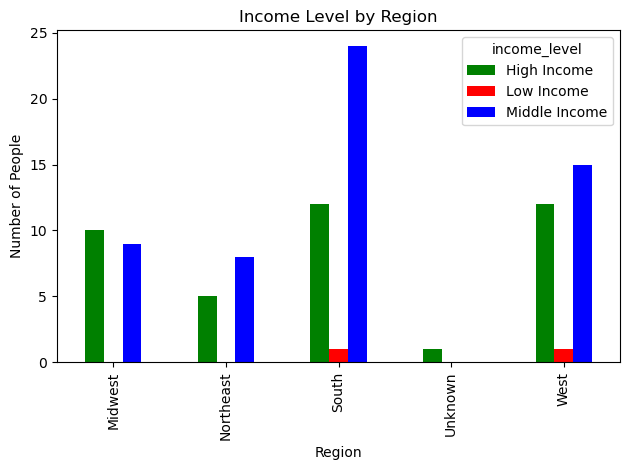

In [75]:
# Create bar chart
region_income_bar=region_income.plot.bar(color=['green', 'red', 'blue'])

# Add labels
plt.title('Income Level by Region')
plt.xlabel("Region")
plt.ylabel("Number of People")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income_bar_chart.png'))

### Customer Profiling: Region and Dependents

In [77]:
# Create region and dependents flag crosstab

region_dependents_flag=pd.crosstab(sample_df['region'], sample_df['dependents_flag'], dropna=False)

# Display output
region_dependents_flag

dependents_flag,has dependents,no dependents
region,,
Midwest,14,5
Northeast,10,3
South,29,8
Unknown,1,0
West,23,5


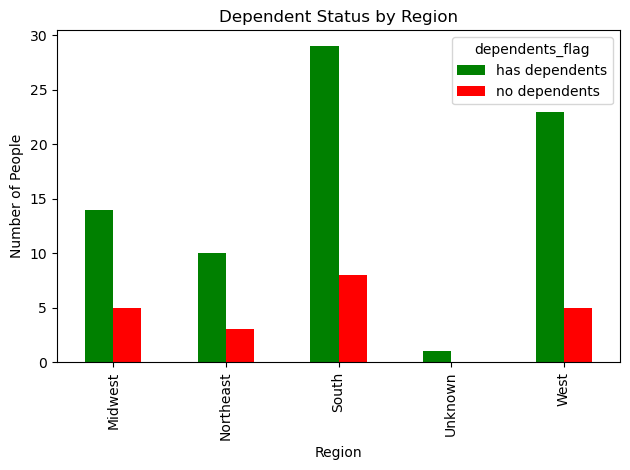

In [78]:
# Create bar chart
region_dependents_bar=region_dependents_flag.plot.bar(color=['green', 'red'])

# Add labels
plt.title('Dependent Status by Region')
plt.xlabel("Region")
plt.ylabel("Number of People")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dependents_bar_chart.png'))

### Customer Profiling: Region and Departments

In [80]:
# Create region and departments crosstab

region_departments=pd.crosstab(sample_df['department'], sample_df['region'], dropna=False)

# Display output
region_departments

region,Midwest,Northeast,South,Unknown,West
department,,,,,
alcohol,0,0,1,0,0
babies,0,1,0,0,0
bakery,1,1,1,0,1
beverages,2,0,2,1,3
breakfast,1,0,1,0,0
canned goods,0,1,1,0,2
dairy eggs,5,2,4,0,3
deli,0,2,2,0,1
dry goods pasta,0,0,1,0,1


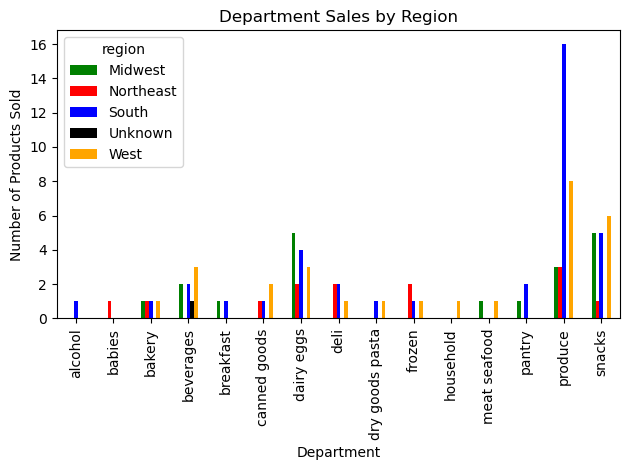

In [145]:
# Create bar chart
region_departments_bar=region_departments.plot.bar(color=['green', 'red', 'blue', 'black', 'orange'])

# Add labels
plt.title('Department Sales by Region')
plt.xlabel("Department")
plt.ylabel("Number of Products Sold")
plt.tight_layout()

# Export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_departments_bar_chart.png'))